# EDA report of Chicago zero vision sample data

- crashes.sample2020.csv
- people.sample.csv
- vehicles.sample.csv

### **(Team 1) Team Challenger**
- Shelly (YI-HSUAN) s0572048
- Catherine s0572057
- Ender s0572050
- Tony (Pawin) s0572079
- Shantenau 

**Time**
- 2020.Oct.22 9:45am

## Import packages and datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import scipy.stats as ss
%matplotlib inline

crashes_sample = pd.read_csv("crashes.sample2020.csv")
vehicles_sample = pd.read_csv("vehicles.sample.csv")
people_sample = pd.read_csv("people.sample.csv")

/Users/shellylin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (21,40,41,42,44,48,49,50,58,59,61) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Quick overview of the first 5 rows of 3 datasets

In [3]:
from IPython.display import display
display(crashes_sample.head())
display(vehicles_sample.head())
display(people_sample.head())

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,0211e1f766f3940dfa87375661d25b716655e908c320cc...,JC301403,NaN,06/11/2019 08:40:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,8,3,6,41.794779,-87.623828,POINT (-87.623828038036 41.794778764028)
1,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,JB256393,NaN,05/09/2018 11:30:00 AM,25,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,11,4,5,41.721290,-87.628510,POINT (-87.628509593966 41.72128957001)
2,03def753c76d0105940f82e9eaac6f1d87683b7a574c20...,JB246843,NaN,05/02/2018 12:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,...,1.0,0.0,0.0,0.0,12,4,5,41.809781,-87.594213,POINT (-87.594212812011 41.809781151018)
3,14fc616db83000e28d672601062a56d76583c0889a764b...,JB372787,NaN,07/31/2018 11:25:00 AM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,11,3,7,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
4,1a9af7862e8471daf453354e6aae4561d0ff4f2f1bfb30...,JB490362,NaN,10/25/2018 10:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,22,5,10,41.946644,-87.686894,POINT (-87.686894106014 41.946643528978)


,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,228894,2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...,JA453603,10/01/2017 02:20:00 AM,1,DRIVER,NaN,224185.0,NaN,DODGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,228895,2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...,JA453603,10/01/2017 02:20:00 AM,2,PARKED,NaN,224187.0,NaN,GENERAL MOTORS CORP.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,228896,2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...,JA453603,10/01/2017 02:20:00 AM,3,PARKED,NaN,224191.0,NaN,SATURN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,228905,f7210aec9ac43a7b36c30b49033adebcb3060b96580341...,JA453640,10/01/2017 02:41:00 AM,1,DRIVER,NaN,224199.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,228906,f7210aec9ac43a7b36c30b49033adebcb3060b96580341...,JA453640,10/01/2017 02:41:00 AM,2,DRIVERLESS,NaN,224203.0,NaN,CHEVROLET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O925562,DRIVER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,JD310165,877509.0,07/26/2020 01:50:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O925563,DRIVER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,JD310165,877518.0,07/26/2020 01:50:00 AM,NaN,CHICAGO,IL,60653,...,NaN,OTHER,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O925608,DRIVER,35b6535a691e99e723bb7322a02fcf5e478f356bad52e1...,JD310239,877558.0,07/26/2020 03:44:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST REFUSED,NaN,NaN
3,O925609,DRIVER,35b6535a691e99e723bb7322a02fcf5e478f356bad52e1...,JD310239,877560.0,07/26/2020 03:44:00 AM,NaN,EVANSTON,IL,60201,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O925693,DRIVER,b19286bd551b80e04f20663d46a3fae8238a8f40ddee4c...,JD310543,877642.0,07/26/2020 11:50:00 AM,NaN,CHICAGO,IL,60638,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


## Quick summary of 3 tables

<table style="width:100%">
    
   <tr>
        <td>  </td> 
        <td> No# rows </td> 
        <td> No# columns  </td> 
        <td> No# object </td>
        <td> No# float </td> 
        <td> No# int64 </td> 
   <tr> 
       
   <tr>
        <td> Crashes </td> 
        <td> $33,408$ </td> 
        <td> $49$  </td> 
        <td> $32$ </td> 
        <td> $10$ </td> 
        <td> $7$ </td> 
    <tr>
    
    
   <tr>
        <td> People </td> 
        <td> $82,049$ </td> 
        <td> $30$  </td> 
        <td> $26$ </td> 
        <td> $4$ </td> 
        <td> $0$ </td> 
    <tr>
        
   <tr>
        <td> Vehicle </td> 
        <td> $75,673$ </td> 
        <td> $72$  </td> 
        <td> $59$ </td> 
        <td> $11$ </td> 
        <td> $2$ </td> 
    <tr>
        
</table>

In [4]:
print("** Crashes_sample data info **") 
crashes_sample.info()

print("** Vehicles_sample data info **") 
vehicles_sample.info()

print("** People_sample data info **") 
people_sample.info()

** Crashes_sample data info **
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33408 entries, 0 to 33407
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                33408 non-null  object 
 1   RD_NO                          33021 non-null  object 
 2   CRASH_DATE_EST_I               2337 non-null   object 
 3   CRASH_DATE                     33408 non-null  object 
 4   POSTED_SPEED_LIMIT             33408 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         33408 non-null  object 
 6   DEVICE_CONDITION               33408 non-null  object 
 7   WEATHER_CONDITION              33408 non-null  object 
 8   LIGHTING_CONDITION             33408 non-null  object 
 9   FIRST_CRASH_TYPE               33408 non-null  object 
 10  TRAFFICWAY_TYPE                33408 non-null  object 
 11  LANE_CNT                       10996 non-null  float64
 12  ALIGNMENT      

In [5]:
# Missing values columns of 3 datasets
print("Crashes_sample: " + str(sum(crashes_sample.isnull().mean().round(2) > 0.55)) + "(49) columns have > 55% missing values")
print("People_sample: " + str(sum(people_sample.isnull().mean().round(2) > 0.55)) + "(30) columns have > 55% missing values")
print("Vehicles_sample: " + str(sum(vehicles_sample.isnull().mean().round(2) > 0.55)) + "(72) columns have > 55% missing values")

Crashes_sample: 11(49) columns have > 55% missing values
People_sample: 9(30) columns have > 55% missing values
Vehicles_sample: 54(72) columns have > 55% missing values


In [6]:
# No Missing values columns of 3 datasets
print("Crashes_sample: " + str(sum(crashes_sample.isnull().mean().round(50) == 0)) + "(49) columns have 0 missing values")
print("People_sample: " + str(sum(people_sample.isnull().mean().round(50) == 0)) + "(30) columns have 0 missing values")
print("Vehicles_sample: " + str(sum(vehicles_sample.isnull().mean().round(50) == 0)) + "(72) columns have 0 missing values")

Crashes_sample: 25(49) columns have 0 missing values
People_sample: 4(30) columns have 0 missing values
Vehicles_sample: 4(72) columns have 0 missing values


## Check if duplicated rows or columns

In [7]:
print("Number of duplicate rows in crashes_sample: ", sum(crashes_sample.duplicated()))
print("Number of duplicate rows in people_sample: ", sum(people_sample.duplicated()))
print("Number of duplicate rows in vehicles_sample: ", sum(vehicles_sample.duplicated()))
print("Number of duplicate columns in crashes_sample: ", sum(crashes_sample.columns.duplicated()))
print("Number of duplicate columns in people_sample: ", sum(people_sample.columns.duplicated()))
print("Number of duplicate columns in vehicles_sample: ", sum(vehicles_sample.columns.duplicated()))

Number of duplicate rows in crashes_sample:  0
Number of duplicate rows in people_sample:  0
Number of duplicate rows in vehicles_sample:  0
Number of duplicate columns in crashes_sample:  0
Number of duplicate columns in people_sample:  0
Number of duplicate columns in vehicles_sample:  0


## People sample dataset EDA

In [8]:
# Primary key to connect to other table - "CRASH_RECORD_ID"
# PERSON_ID, PERSON_TYPE, CRASH_RECORD_ID, CRASH_DATE has no missing values
print("Unique PERSON_ID in people_sample: ",people_sample['PERSON_ID'].nunique()) #82,049 unique PERSON_ID
print("Unique CRASH_RECORD_ID in people_sample: ",people_sample['CRASH_RECORD_ID'].nunique()) #36,826 CRASH_ID
print("Unique RD_ID in people_sample: ",people_sample['RD_NO'].nunique()) #32,938 unique RD_ID
print("Unique VEHICLE_ID in people_sample: ",people_sample['VEHICLE_ID'].nunique()) #63,917 unique VEHICLE_ID

Unique PERSON_ID in people_sample:  82049
Unique CRASH_RECORD_ID in people_sample:  36826
Unique RD_ID in people_sample:  32938
Unique VEHICLE_ID in people_sample:  63917


Numerical Columns of people_sample data


,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,80306.000000,17214.000000,59254.000000,134.000000
mean,602088.561652,4.193099,37.805633,0.169328
std,214429.123290,2.235407,17.150075,0.087447
min,224185.000000,1.000000,0.000000,0.000000
25%,414668.250000,3.000000,25.000000,0.120000
50%,606222.500000,3.000000,35.000000,0.170000
75%,795201.000000,6.000000,50.000000,0.210000
max,920208.000000,12.000000,110.000000,0.440000


Average AGE break down by SEX


,SEX,AGE
0,F,36.573587
1,M,38.782678
2,X,35.405405


/Users/shellylin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/shellylin/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


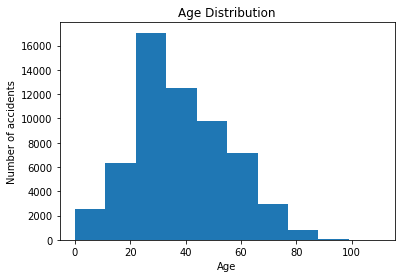

In [9]:
print("Numerical Columns of people_sample data")
# whole data Average age = 37.8
# VEHICLE_ID, SEAT_NO => should change to categorical
display(people_sample.describe())

print("Average AGE break down by SEX")
display(people_sample.groupby("SEX", as_index=False).AGE.mean())

x = people_sample.AGE
plt.hist(x, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of accidents')

plt.show()

Categorical Columns correlation of people_sample data


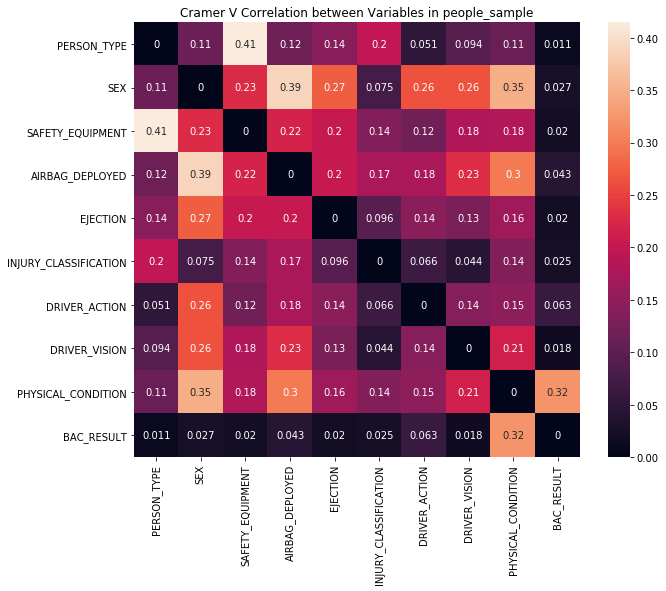

In [23]:
# Categorical Columns
print("Categorical Columns correlation of people_sample data")
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

cols = ["PERSON_TYPE", "SEX", "SAFETY_EQUIPMENT", "AIRBAG_DEPLOYED", "EJECTION", "INJURY_CLASSIFICATION", "DRIVER_ACTION", "DRIVER_VISION", "PHYSICAL_CONDITION", "BAC_RESULT"]
corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(people_sample[col1], people_sample[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables in people_sample");

6 groups of PERSON_TYPE:  PERSON_TYPE
BICYCLE                  593
DRIVER                 63122
NON-CONTACT VEHICLE       16
NON-MOTOR VEHICLE         79
PASSENGER              17214
PEDESTRIAN              1025
dtype: int64


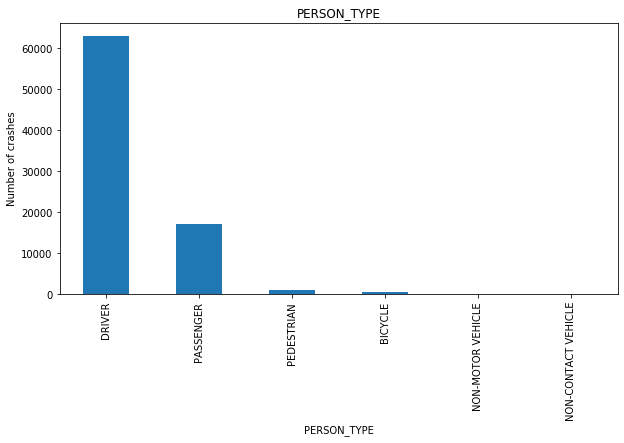

In [11]:
# PERSON_TYPE column
print("6 groups of PERSON_TYPE: ", + people_sample.groupby(['PERSON_TYPE']).size())
people_sample.PERSON_TYPE.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("PERSON_TYPE")
plt.ylabel('Number of crashes')
plt.xlabel('PERSON_TYPE');

### 1st column - PERSON_ID
- IDs starting with P indicate passengers. 
- IDs starting with O indicate a person who was not a passenger in the vehicle (e.g., driver, pedestrian, cyclist, etc.).
https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

In [12]:
display(people_sample[people_sample['PERSON_ID'].str.match('P')]) #17,214 rows start with "P"
people_sample[people_sample['PERSON_ID'].str.match('O')] #64,835 rows start with "O"

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
30,P211417,PASSENGER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,JD310165,877509.0,07/26/2020 01:50:00 AM,3.0,NaN,IL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1585,P213701,PASSENGER,6232608703805c008ded983adea0a359f171fc2faa1bd6...,JD328073,887358.0,08/10/2020 03:08:00 PM,3.0,CHICAGO,IL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5280,P211625,PASSENGER,b2b6938d2d17c886604bd689d8db8b8ddd5eea644c4d53...,JD311981,878448.0,07/27/2020 04:30:00 PM,3.0,NaN,IL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5309,P211637,PASSENGER,409ae9f90fff2f6f179be0150d7d3ce521e834572d8042...,JD312101,878506.0,07/27/2020 04:45:00 PM,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5436,P211666,PASSENGER,9059dd07be42310025c5cbd473b5646b9e593b5679e647...,JD312264,878604.0,07/27/2020 05:10:00 PM,4.0,NaN,IL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82044,P211331,PASSENGER,77c6896f7590443e32852c8ab7c1b60d1b05dec415263b...,JD309784,877262.0,07/25/2020 04:50:00 PM,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82045,P211347,PASSENGER,d522d6647f22c5838842144002127a8b679ca60a029dbf...,JD309798,877337.0,07/25/2020 05:25:00 PM,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82046,P211349,PASSENGER,d522d6647f22c5838842144002127a8b679ca60a029dbf...,JD309798,877342.0,07/25/2020 05:25:00 PM,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82047,P211350,PASSENGER,d522d6647f22c5838842144002127a8b679ca60a029dbf...,JD309798,877342.0,07/25/2020 05:25:00 PM,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O925562,DRIVER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,JD310165,877509.0,07/26/2020 01:50:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O925563,DRIVER,70a18f80d33a3e2bdde9f21c7c0cafaa8d133285c2a395...,JD310165,877518.0,07/26/2020 01:50:00 AM,NaN,CHICAGO,IL,60653,...,NaN,OTHER,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O925608,DRIVER,35b6535a691e99e723bb7322a02fcf5e478f356bad52e1...,JD310239,877558.0,07/26/2020 03:44:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST REFUSED,NaN,NaN
3,O925609,DRIVER,35b6535a691e99e723bb7322a02fcf5e478f356bad52e1...,JD310239,877560.0,07/26/2020 03:44:00 AM,NaN,EVANSTON,IL,60201,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O925693,DRIVER,b19286bd551b80e04f20663d46a3fae8238a8f40ddee4c...,JD310543,877642.0,07/26/2020 11:50:00 AM,NaN,CHICAGO,IL,60638,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82033,O925763,DRIVER,51754a24fdb04a18409ffd68b1a65fd35af77cf5d3cd7e...,JD310672,877723.0,07/25/2020 04:05:00 PM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
82034,O925764,DRIVER,51754a24fdb04a18409ffd68b1a65fd35af77cf5d3cd7e...,JD310672,877714.0,07/25/2020 04:05:00 PM,NaN,CHICAGO,IL,60644,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
82035,O925861,DRIVER,5d7eca39355a59a295fc915e811bf504f04a0da234e32d...,JD310847,877793.0,07/25/2020 04:30:00 PM,NaN,CHICAGO,IL,60653,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
82036,O925862,DRIVER,5d7eca39355a59a295fc915e811bf504f04a0da234e32d...,JD310847,877796.0,07/25/2020 04:30:00 PM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


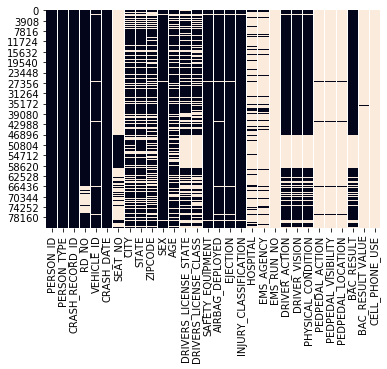

In [13]:
# visualize the location of missing values of people_sample
sns.heatmap(people_sample.isnull(), cbar=False)

### Recommended Target Feature Columns
- PERSON_TYPE (6) ex: PEDESTRIAN vs. Non-PEDESTRIAN => to focus on pedestrian's safety
- SEX (3)
- SAFETY_EQUIPMENT (19) (but remove some features) 
- AIRBAG_DEPLOYED (7)
- EJECTION (5)
- INJURY_CLASSIFICATION (5) => important
- DRIVER_ACTION (20) (but remove some features) 
- DRIVER_VISION (14) (but remove some features)
- PHYSICAL_CONDITION (12) (but remove somee features)
- BAC_RESULT (4) ex: test taken vs. all the rest

In [14]:
people_sample.groupby(['PERSON_TYPE']).size()

PERSON_TYPE
BICYCLE                  593
DRIVER                 63122
NON-CONTACT VEHICLE       16
NON-MOTOR VEHICLE         79
PASSENGER              17214
PEDESTRIAN              1025
dtype: int64

## Crashes sample dataset EDA

In [15]:
# float64(10), int64(7) numerical columns summary
crashes_sample.describe()
# STREET_NO, CRASH_HOUR, CRASH_DAY_OF_WEEK, CRASH_MONTH should change to categorical

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,33408.000000,10996.000000,33408.000000,33408.000000,33408.000000,33324.000000,33324.00000,33324.000000,33324.000000,33324.000000,33324.000000,33324.0,33408.000000,33408.000000,33408.000000,33215.000000,33215.000000
mean,28.420318,2.498272,3662.141134,1250.213332,2.037895,0.195205,0.00108,0.021936,0.109501,0.062688,2.030729,0.0,13.152029,4.122815,6.660500,41.856674,-87.674102
std,6.210942,1.669592,2847.516283,704.127405,0.471285,0.564194,0.03463,0.173489,0.420830,0.318674,1.220179,0.0,5.542940,1.980078,3.438983,0.335981,0.682890
min,0.000000,0.000000,1.000000,111.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.933994
25%,30.000000,2.000000,1240.000000,722.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.786257,-87.722139
50%,30.000000,2.000000,3199.000000,1214.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.876677,-87.674754
75%,30.000000,4.000000,5518.000000,1822.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924907,-87.633925
max,70.000000,99.000000,13758.000000,2535.000000,12.000000,8.000000,2.00000,5.000000,8.000000,7.000000,46.000000,0.0,23.000000,7.000000,12.000000,42.022720,0.000000


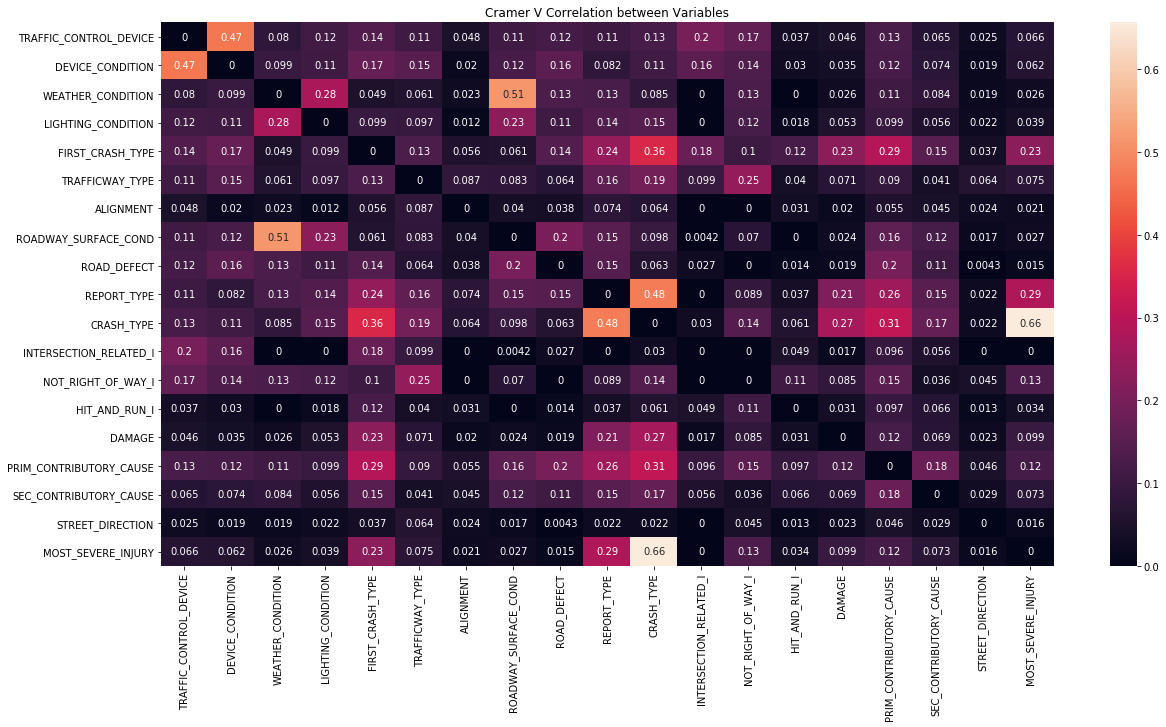

In [24]:
# Crashes Categorical variables correlation using cramer's v
# source : https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
# source : https://www.kaggle.com/phaethonprime/eda-and-logistic-regression
cols = ["TRAFFIC_CONTROL_DEVICE", "DEVICE_CONDITION", "WEATHER_CONDITION", "LIGHTING_CONDITION", "FIRST_CRASH_TYPE", "TRAFFICWAY_TYPE", "ALIGNMENT", "ROADWAY_SURFACE_COND", "ROAD_DEFECT", "REPORT_TYPE", "CRASH_TYPE", "INTERSECTION_RELATED_I", "NOT_RIGHT_OF_WAY_I", "HIT_AND_RUN_I", "DAMAGE", "PRIM_CONTRIBUTORY_CAUSE", "SEC_CONTRIBUTORY_CAUSE", "STREET_DIRECTION", "MOST_SEVERE_INJURY"]
corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(crashes_sample[col1], crashes_sample[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

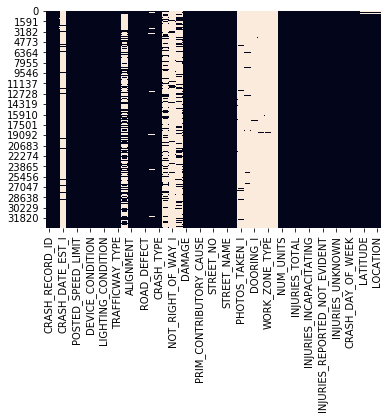

In [17]:
# visualize the location of missing values of crashes_sample
sns.heatmap(crashes_sample.isnull(), cbar=False)

CRASH_MONTH
1     2711
2     2628
3     2540
4     2285
5     2820
6     2924
7     3019
8     2837
9     2786
10    3155
11    2746
12    2957
dtype: int64

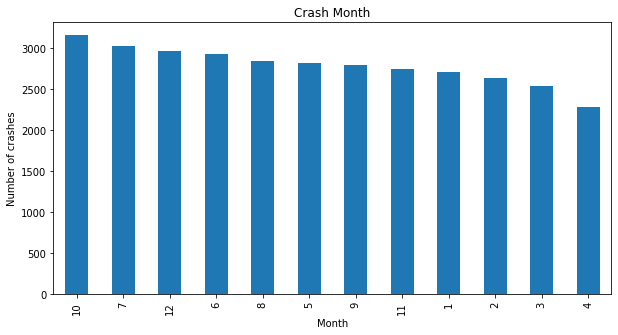

In [18]:
# MONTHLY distribution of crashes
display(crashes_sample.groupby(['CRASH_MONTH']).size())
crashes_sample.groupby(['CRASH_MONTH']).size().nlargest(12).plot(kind='bar', figsize=(10,5))
plt.title("Crash Month")
plt.ylabel('Number of crashes')
plt.xlabel('Month');

## Vehicles sample data EDA

In [19]:
# float64(11), int64(2) 13 numerical columns summary
vehicles_sample.describe()

,CRASH_UNIT_ID,UNIT_NO,NUM_PASSENGERS,VEHICLE_ID,VEHICLE_YEAR,OCCUPANT_CNT,CMV_ID,HAZMAT_REPORT_NO,MCS_REPORT_NO,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT
count,75673.000000,75673.000000,11633.000000,73804.000000,61945.000000,73804.000000,886.000000,0.0,0.0,132.000000,3.000000,148.000000,239.000000
mean,636542.746819,1.573243,1.479756,606345.289334,2012.930955,1.088762,6578.375847,NaN,NaN,48.719697,37.333333,50.858108,112.435146
std,229743.763303,0.654345,1.119244,215477.478218,129.699968,0.879280,2878.475327,NaN,NaN,15.010589,15.947832,21.055809,1682.148492
min,228894.000000,0.000000,1.000000,224185.000000,1900.000000,0.000000,1515.000000,NaN,NaN,1.000000,19.000000,1.000000,1.000000
25%,436244.000000,1.000000,1.000000,418742.000000,2006.000000,1.000000,4145.750000,NaN,NaN,48.000000,32.000000,33.000000,2.000000
50%,642576.000000,2.000000,1.000000,611440.500000,2012.000000,1.000000,6602.000000,NaN,NaN,53.000000,45.000000,56.000000,3.000000
75%,845390.000000,2.000000,2.000000,802301.500000,2016.000000,1.000000,9189.750000,NaN,NaN,53.000000,46.500000,65.750000,5.000000
max,970977.000000,12.000000,43.000000,920209.000000,9999.000000,99.000000,10831.000000,NaN,NaN,101.000000,48.000000,96.000000,26009.000000


In [20]:
# get the list of categorical columns (59)
vehicles_sample.select_dtypes(exclude=['int', 'float']).columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'UNIT_TYPE', 'CMRC_VEH_I',
       'MAKE', 'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 'TOWED_I', 'FIRE_I',
       'EXCEED_SPEED_LIMIT_I', 'TOWED_BY', 'TOWED_TO', 'AREA_00_I',
       'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 'AREA_04_I', 'AREA_05_I',
       'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I', 'AREA_10_I',
       'AREA_11_I', 'AREA_12_I', 'AREA_99_I', 'FIRST_CONTACT_POINT',
       'USDOT_NO', 'CCMC_NO', 'ILCC_NO', 'COMMERCIAL_SRC', 'GVWR',
       'CARRIER_NAME', 'CARRIER_STATE', 'CARRIER_CITY', 'HAZMAT_PLACARDS_I',
       'HAZMAT_NAME', 'UN_NO', 'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I',
       'MCS_REPORT_I', 'HAZMAT_VIO_CAUSE_CRASH_I', 'MCS_VIO_CAUSE_CRASH_I',
       'IDOT_PERMIT_NO', 'WIDE_LOAD_I', 'TRAILER1_WIDTH', 'TRAILER2_WIDTH',
       'VEHICLE_CONFIG', 'CARGO_BODY_TYPE', 'LOAD_TYPE',
       'HAZMAT_OUT_OF_SERVICE_I', 'MCS_OUT_OF_SERVICE_I', 'HAZMAT_CL

In [21]:
# Primary key to connect to other table - "CRASH_RECORD_ID"
# CRASH_UNIT_ID, CRASH_RECORD_ID, CRASH_DATE, UNIT_NO has no missing values
print("Unique CRASH_UNIT_ID in vehicles_sample: ",vehicles_sample['CRASH_UNIT_ID'].nunique()) #82,049 unique PERSON_ID
print("Unique CRASH_RECORD_ID in vehicles_sample: ",vehicles_sample['CRASH_RECORD_ID'].nunique()) #36,826 CRASH_ID

Unique CRASH_UNIT_ID in vehicles_sample:  75673
Unique CRASH_RECORD_ID in vehicles_sample:  36923


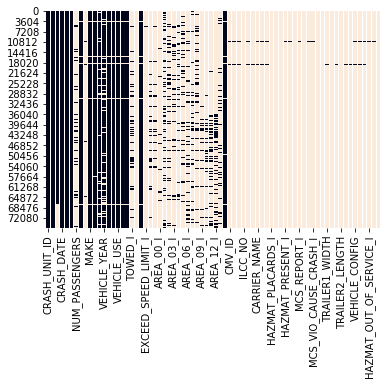

In [22]:
# visualize the location of missing values of vehicles_sample
sns.heatmap(vehicles_sample.isnull(), cbar=False)

Object `sns.heatmap()` not found.


In [82]:
# Select observations between two datetimes
people_sample[(people_sample['CRASH_DATE'] > '01/01/2017 01:00:00 AM') & (people_sample['CRASH_DATE'] <= '01/01/2018 02:00:00 AM')]

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
5094,O294176,DRIVER,04f21de4e445ade0142061959350836e18b766323ee9d5...,JB100386,285295.0,01/01/2018 02:00:00 AM,NaN,CHICAGO,IL,60639,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
5108,O294340,DRIVER,bd6e558d30e7784135be1dbd993fa6b42e10e85f1fa580...,JB100691,285451.0,01/01/2018 01:20:00 PM,NaN,GLENVIEW,IL,60025,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
5109,O294341,DRIVER,bd6e558d30e7784135be1dbd993fa6b42e10e85f1fa580...,JB100691,285454.0,01/01/2018 01:20:00 PM,NaN,FRANKFORT,IL,60423,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
5116,O294467,DRIVER,d9ad51939f7e2161555f3b9de4353a55270aeb24686c6e...,JB100842,285572.0,01/01/2018 02:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
5255,O296184,DRIVER,bca5c55a2351ef19bf5b7b11e94820c3480ac5c9dc7519...,JB103128,287181.0,01/01/2018 01:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,OTHER,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
5256,O296185,DRIVER,bca5c55a2351ef19bf5b7b11e94820c3480ac5c9dc7519...,JB103128,287198.0,01/01/2018 01:00:00 AM,NaN,CHICAGO,IL,60615,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [83]:
people_sample[["CRASH_DATE"]]

,CRASH_DATE
0,07/26/2020 01:50:00 AM
1,07/26/2020 01:50:00 AM
2,07/26/2020 03:44:00 AM
3,07/26/2020 03:44:00 AM
4,07/26/2020 11:50:00 AM
...,...
82044,07/25/2020 04:50:00 PM
82045,07/25/2020 05:25:00 PM
82046,07/25/2020 05:25:00 PM
82047,07/25/2020 05:25:00 PM


In [ ]:
# missing value pattern : https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj
# cramer's : https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9